<a href="https://colab.research.google.com/github/Nidhi89717/ML/blob/main/09-Boosted-Trees/02_Gradient_Boosting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Gradient Boosting and GridSearch


### Mushroom Hunting: Edible or Poisonous?

Data Source: https://archive.ics.uci.edu/ml/datasets/Mushroom


This data set includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family (pp. 500-525). Each species is identified as definitely edible, definitely poisonous, or of unknown edibility and not recommended. This latter class was combined with the poisonous one. The Guide clearly states that there is no simple rule for determining the edibility of a mushroom; no rule like ``leaflets three, let it be'' for Poisonous Oak and Ivy.


Attribute Information:

1. cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s
2. cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s
3. cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r, pink=p,purple=u,red=e,white=w,yellow=y
4. bruises?: bruises=t,no=f
5. odor: almond=a,anise=l,creosote=c,fishy=y,foul=f, musty=m,none=n,pungent=p,spicy=s
6. gill-attachment: attached=a,descending=d,free=f,notched=n
7. gill-spacing: close=c,crowded=w,distant=d
8. gill-size: broad=b,narrow=n
9. gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e, white=w,yellow=y
10. stalk-shape: enlarging=e,tapering=t
11. stalk-root: bulbous=b,club=c,cup=u,equal=e, rhizomorphs=z,rooted=r,missing=?
12. stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s
13. stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s
14. stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y
15. stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y
16. veil-type: partial=p,universal=u
17. veil-color: brown=n,orange=o,white=w,yellow=y
18. ring-number: none=n,one=o,two=t
19. ring-type: cobwebby=c,evanescent=e,flaring=f,large=l, none=n,pendant=p,sheathing=s,zone=z
20. spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r, orange=o,purple=u,white=w,yellow=y
21. population: abundant=a,clustered=c,numerous=n, scattered=s,several=v,solitary=y
22. habitat: grasses=g,leaves=l,meadows=m,paths=p, urban=u,waste=w,woods=d

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [11]:
df = pd.read_csv('gdrive/My Drive/csv_files/mushrooms.csv')

In [12]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X = df.drop('class',axis=1)

In [15]:
X = pd.get_dummies(X,drop_first=True)

In [16]:
y = df['class']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=101)

In [18]:
from sklearn.ensemble import GradientBoostingClassifier

In [19]:
from sklearn.model_selection import GridSearchCV

In [20]:
param_grid = {'n_estimators':[50,100],
              'learning_rate':[0.1,0.05,0.2],
              'max_depth':[3,4,5]}

In [21]:
gb_model = GradientBoostingClassifier()

In [22]:
grid = GridSearchCV(gb_model,param_grid)

In [23]:
grid.fit(X_train,y_train)

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.1, 0.05, 0.2],
                         'max_depth': [3, 4, 5], 'n_estimators': [50, 100]})

In [24]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

In [25]:
predictions = grid.predict(X_test)

In [26]:
grid.best_estimator_

GradientBoostingClassifier()

In [27]:
grid.best_params_

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}

In [28]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           e       1.00      1.00      1.00       655
           p       1.00      1.00      1.00       564

    accuracy                           1.00      1219
   macro avg       1.00      1.00      1.00      1219
weighted avg       1.00      1.00      1.00      1219



In [29]:
grid.best_estimator_.feature_importances_

array([2.91150176e-04, 4.11800926e-16, 5.10174192e-18, 0.00000000e+00,
       7.93438486e-17, 1.05030313e-03, 3.73209757e-18, 8.63570268e-17,
       1.96841949e-18, 6.63136525e-18, 0.00000000e+00, 0.00000000e+00,
       1.63889388e-18, 0.00000000e+00, 0.00000000e+00, 2.22085607e-08,
       2.31055039e-03, 5.55280752e-02, 6.24175887e-04, 1.01380190e-02,
       1.82499853e-02, 1.34044444e-03, 6.14744334e-01, 3.94907433e-03,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.27126988e-02,
       1.07415714e-02, 0.00000000e+00, 3.21431576e-16, 6.65977466e-18,
       2.23508283e-17, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.10955391e-16, 0.00000000e+00, 4.77935388e-18, 2.57865817e-18,
       0.00000000e+00, 7.05927414e-04, 1.36012433e-01, 4.69032068e-03,
       2.48734859e-02, 4.47043435e-04, 5.68983993e-04, 1.15245842e-04,
       3.60117275e-05, 1.35380870e-07, 4.43624194e-02, 5.41491201e-06,
       0.00000000e+00, 0.00000000e+00, 5.54028614e-04, 0.00000000e+00,
      

In [30]:
feat_imp = grid.best_estimator_.feature_importances_

In [31]:
imp_fea = pd.DataFrame(index=X.columns,data=feat_imp,columns=['Importance'])

In [32]:
imp_fea

,Importance
cap-shape_c,2.911502e-04
cap-shape_f,4.118009e-16
cap-shape_k,5.101742e-18
cap-shape_s,0.000000e+00
cap-shape_x,7.934385e-17
...,...
habitat_l,0.000000e+00
habitat_m,9.290576e-17
habitat_p,0.000000e+00
habitat_u,1.004851e-05


In [33]:
imp_fea = imp_fea[imp_fea['Importance']>0.0005]

In [34]:
imp_fea

,Importance
cap-surface_g,0.001050
cap-color_y,0.002311
bruises_t,0.055528
odor_c,0.000624
odor_f,0.010138
odor_l,0.018250
odor_m,0.001340
odor_n,0.614744
odor_p,0.003949
gill-spacing_w,0.012713


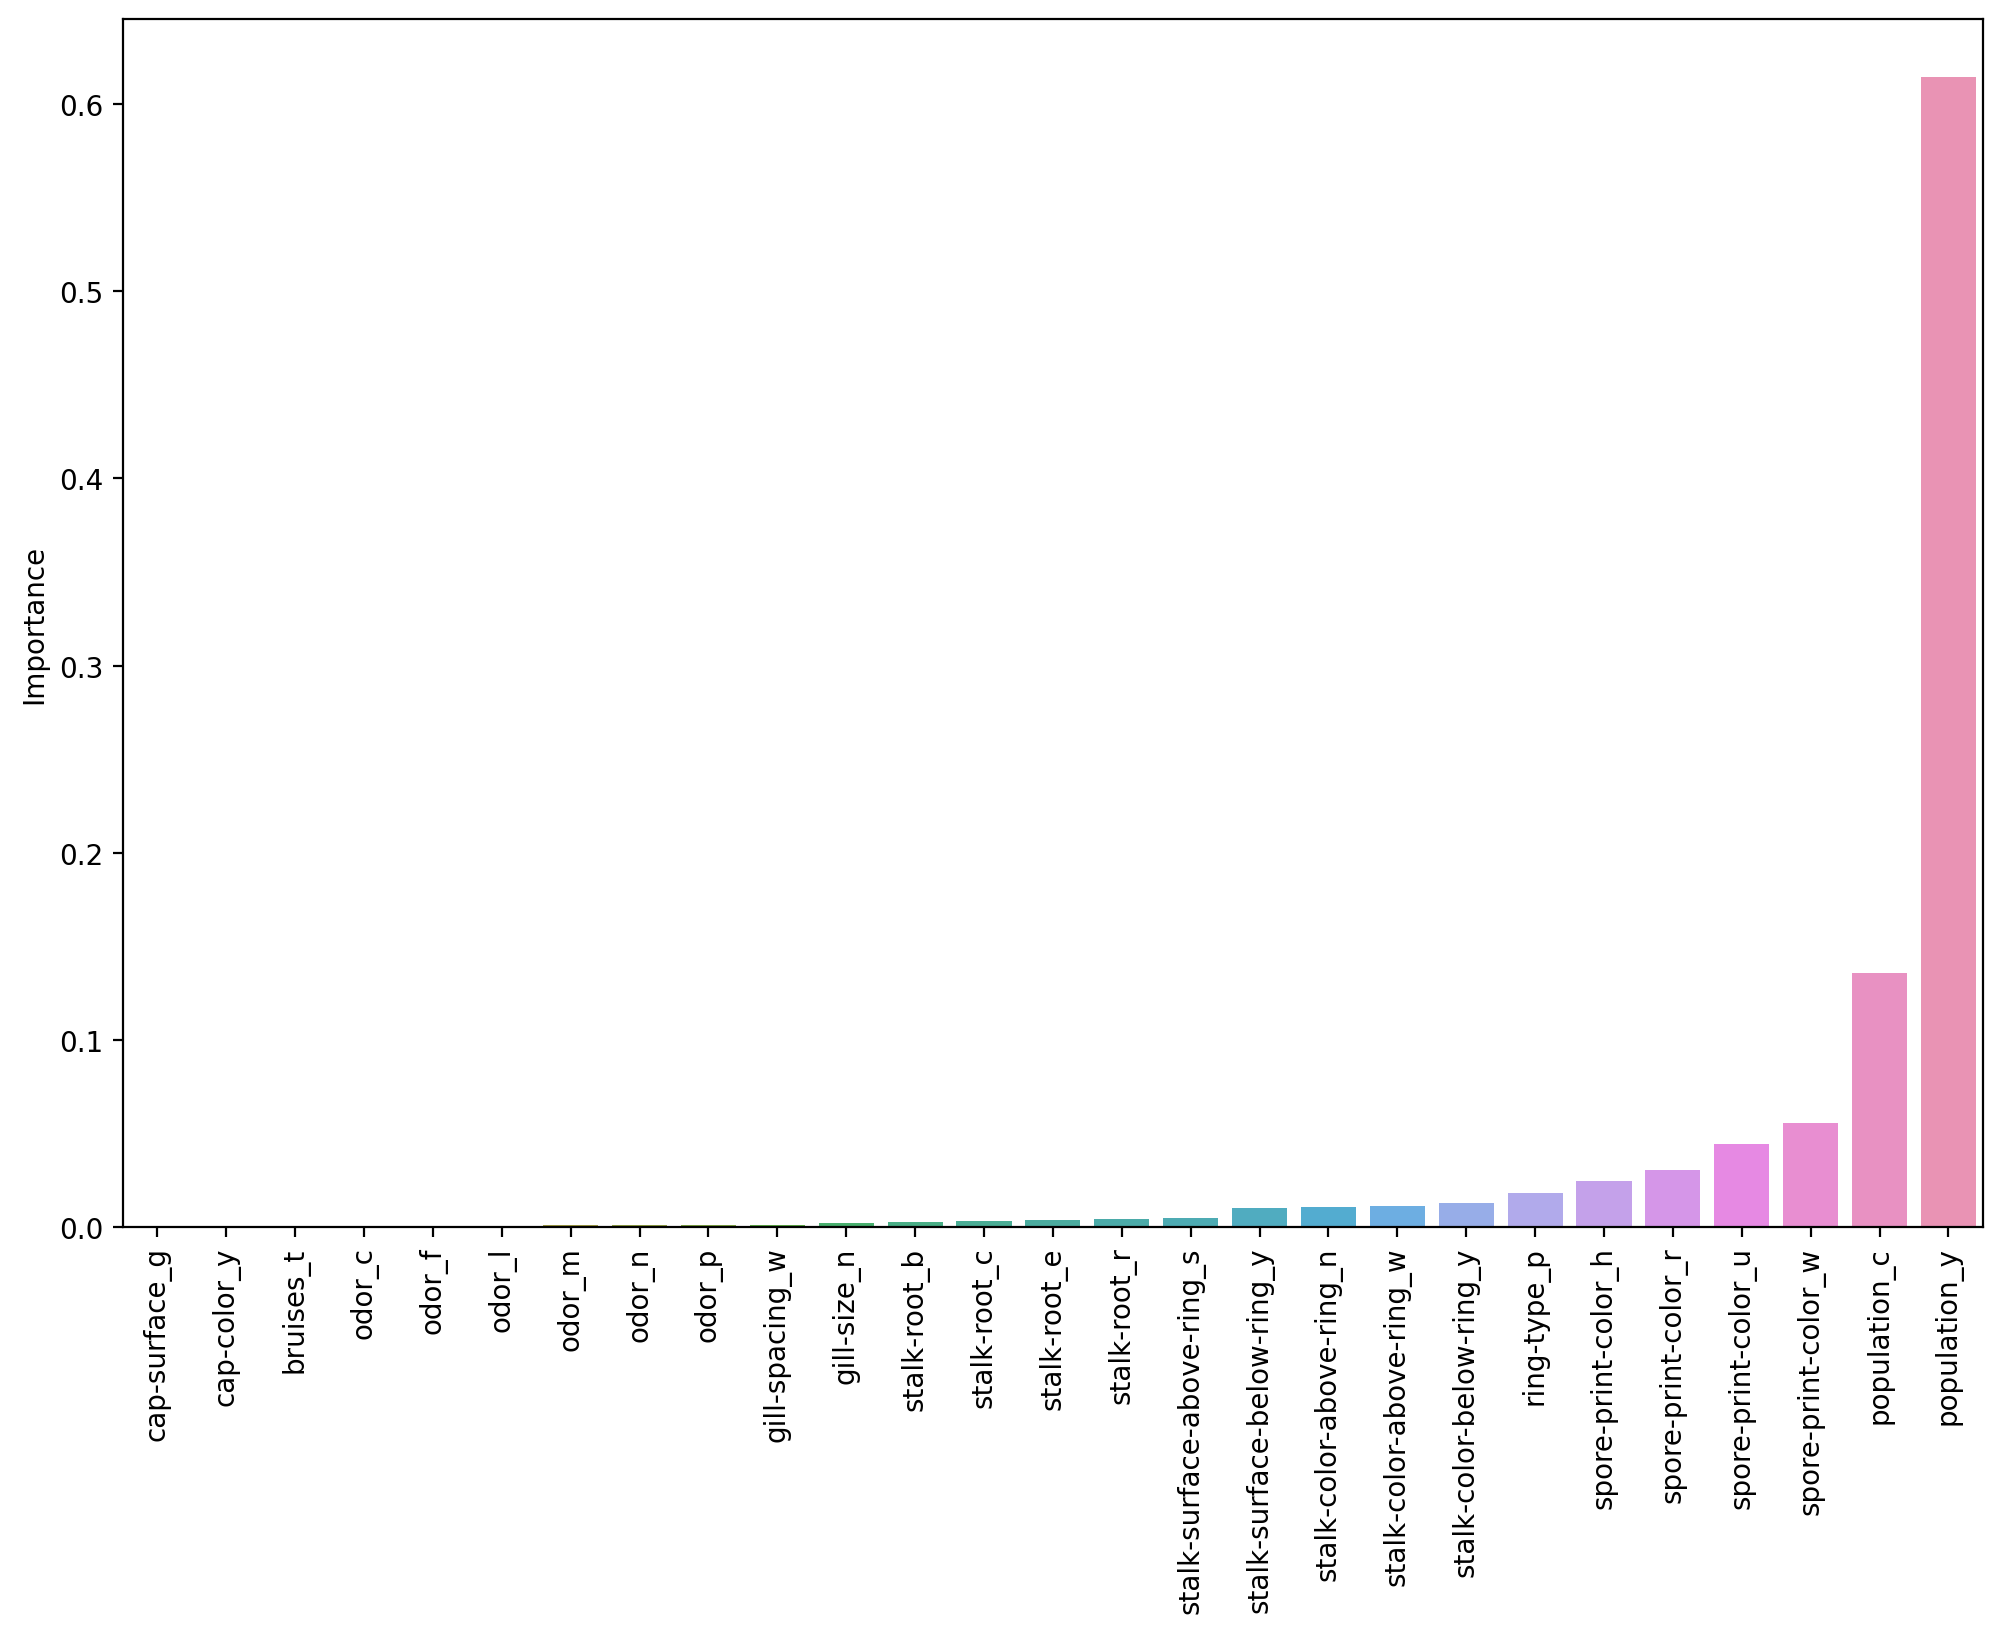

In [35]:
plt.figure(figsize=(12,8),dpi=200)
sns.barplot(data=imp_fea.sort_values('Importance'),x=imp_fea.index,y='Importance')
plt.xticks(rotation=90);